In [1]:
import ROOT
import matplotlib
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import trange
import os,sys
from array import array
import time

from Lumi import *
from Ratio_Plot import *
from TDR_Style import *

Welcome to JupyROOT 6.24/06


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


### 1. Selecte Branch and Channels

In [2]:
branch = {

    "WZG_trileptonmass":{
        "name":"WZG_trileptonmass",
        "axis_name":"m_{WZ} [GeV]",
        "xbins":10,
        "xleft":100,
        "xright":500,
    },
    "ttZ_dileptonmass":{
        "name":"WZG_trileptonmass",
        "axis_name":"m_{WZ} [GeV]",
        "xbins":10,
        "xleft":100,
        "xright":500,
    },
    "ttG_dileptonmass":{
        "name":"WZG_trileptonmass",
        "axis_name":"m_{WZ} [GeV]",
        "xbins":10,
        "xleft":100,
        "xright":500,
    },
    "ZZ_trileptonmass":{
        "name":"WZG_trileptonmass",
        "axis_name":"m_{WZ} [GeV]",
        "xbins":10,
        "xleft":100,
        "xright":500,
    }
}


# 0: WZG
# 1: WZG_emm
# 2: WZG_mee
# 3: WZG_eee
# 4: WZG_mmm

# 10: ttZ
# 11: ttZ_emm
# 12: ttZ_mee
# 13: ttZ_eee
# 14: ttZ_mmm


# 20: ttG
# 21: ttG_emm
# 22: ttG_mee
# 23: ttG_eee
# 24: ttG_mmm


# 9: ZZ
# 5: ZZ_eemm
# 6: ZZ_mmee
# 7: ZZ_eeee
# 8: ZZ_mmmm     

year =2016
channel = 0


if channel ==0: 
    hist_name = 'WZG_trileptonmass'
elif channel == 10:
    hist_name = 'ttZ_dileptonmass'
elif channel == 20:
    hist_name = 'ttG_dileptonmass'
elif channel ==9:
    hist_name = 'ZZ_trileptonmass'
else:
    print('channel name error')

if year == 2018:
    lumi = 59.7
elif year == 2017:
    lumi = 41.5
elif year == 2016:
    lumi = 35.86
else:
    print('year name error')
UpDown = 0
# 0: nominal
# 1: JESup 
# 2: JESdown
# 3: JERup
# 4: JERdown

### 2. Select samples

In [3]:
# 2018
if year == 2018:
    filelist_MC = {
        "WZG":
            {"name":"WZG",
            "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/WZG_sample/WZG_2018.root",
            "xsec":0.0384,
            "color":46}
    }

# 2017
elif year ==2017:
    filelist_MC = {
        "WZG":
            {"name":"WZG",
            "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/WZG_sample/WZG_2017.root",
            "xsec":0.0384,
            "color":46}
    }

else:
# 2016
    filelist_MC = {
        "WZG":
            {"name":"WZG",
            "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/WZG_sample/WZG_2016.root",
            "xsec":0.0384,
            "color":46}
    }

## 3. Load branches and conver arrays

In [4]:
file = filelist_MC['WZG']['path']
init_branches = ['channel_mark','HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ',
                 'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8','HLT_Ele32_WPTight_Gsf','HLT_IsoMu24']


if year == 2018:
    add_branches = ['Generator_weight','puWeight','LHEScaleWeight','LHEPdfWeight','Muon_ID_Weight','Electron_ID_Weight','Electron_RECO_Weight']
    
else:
    add_branches = ['Generator_weight','puWeight','LHEScaleWeight','LHEPdfWeight', 'PrefireWeight', 'Muon_ID_Weight','Electron_ID_Weight','Electron_RECO_Weight']
    
    
    
met_branches = uproot.open(file+':Events').keys(filter_name='MET_T1Smear*')
gen_lepton_branches = uproot.open(file+':Events').keys(filter_name='*_lepton*genPartFlav')
gen_photon_branches= uproot.open(file+':Events').keys(filter_name='*_photon*genPartFlav')


true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
init_branches.extend(add_branches)
init_branches.extend(gen_lepton_branches)
init_branches.extend(gen_photon_branches)
init_branches.extend(met_branches)
for branch_name in branch:
    if branch[branch_name]["name"] not in init_branches:
        init_branches.append(branch[branch_name]["name"])
        
branches = uproot.open(file+':Events').arrays(init_branches)
# 'LHEScaleWeight','LHEPdfWeight'

In [5]:
branches.fields

['channel_mark',
 'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL',
 'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL',
 'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ',
 'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8',
 'HLT_Ele32_WPTight_Gsf',
 'HLT_IsoMu24',
 'Generator_weight',
 'puWeight',
 'LHEScaleWeight',
 'LHEPdfWeight',
 'PrefireWeight',
 'Muon_ID_Weight',
 'Electron_ID_Weight',
 'Electron_RECO_Weight',
 'ZZ_lepton1_genPartFlav',
 'ZZ_lepton2_genPartFlav',
 'ZZ_lepton3_genPartFlav',
 'ZZ_lepton4_genPartFlav',
 'WZG_lepton1_genPartFlav',
 'WZG_lepton2_genPartFlav',
 'WZG_lepton3_genPartFlav',
 'ttG_lepton1_genPartFlav',
 'ttG_lepton2_genPartFlav',
 'ttG_lepton3_genPartFlav',
 'ttZ_lepton1_genPartFlav',
 'ttZ_lepton2_genPartFlav',
 'ttZ_lepton3_genPartFlav',
 'WZG_photon_genPartFlav',
 'ttG_photon_genPartFlav',
 'MET_T1Smear_pt',
 'MET_T1Smear_phi',
 'MET_T1Smear_pt_jerUp',
 'MET_T1Smear_phi_jerUp',
 'MET_T1Smear_pt_jesTotalUp',
 'MET_T1Smear_phi_jesTotalUp',
 'MET_T1Smear_pt_unclust

(array([1986.,  570.,  126.,   44.,    8.,    4.,    6.,    2.,    2.,
           2.]),
 array([ 101.07165527,  273.94265137,  446.81364746,  619.68464355,
         792.55563965,  965.42663574, 1138.29763184, 1311.16862793,
        1484.03962402, 1656.91062012, 1829.78161621]),
 <BarContainer object of 10 artists>)

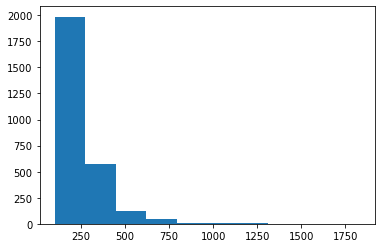

In [6]:
plt.hist(branches[hist_name])

## 4. Apply channel and some cuts

In [7]:


HLT_SingleMuon = branches['HLT_IsoMu24'] == True
HLT_DoubleMuon = branches['HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8'] == True
HLT_EGamma = branches['HLT_Ele32_WPTight_Gsf'] == True
HLT_DoubleEG = branches['HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
HLT_MuonEG1 = branches['HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
HLT_MuonEG2 = branches['HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL'] == True

MC_Trigger_mask = (HLT_SingleMuon | HLT_DoubleMuon |  HLT_EGamma | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2)
arrays = branches[MC_Trigger_mask]

print("Before after trgger: {0}->{1}".format(len(branches),len(arrays)))


if channel == 0:
    channel_cut = (arrays['channel_mark'] >= 1) & (arrays['channel_mark'] <= 4)
elif channel == 10:
    channel_cut = (arrays['channel_mark'] >= 11) & (arrays['channel_mark'] <= 14)
elif channel == 9:
    channel_cut = (arrays['channel_mark'] >= 5) & (arrays['channel_mark'] <= 8)
else:
    channel_cut = arrays['channel_mark'] == channel

lep_gen_cut_WZG = (arrays['WZG_lepton1_genPartFlav'] > 0) & (arrays['WZG_lepton2_genPartFlav'] > 0) & (arrays['WZG_lepton3_genPartFlav'] > 0)
lep_gen_cut_ttZ = (arrays['ttZ_lepton1_genPartFlav'] > 0) & (arrays['ttZ_lepton2_genPartFlav'] > 0) & (arrays['ttZ_lepton3_genPartFlav'] > 0)
lep_gen_cut_ZZ = (arrays['ZZ_lepton1_genPartFlav'] > 0) & (arrays['ZZ_lepton2_genPartFlav'] > 0) & (arrays['ZZ_lepton3_genPartFlav'] > 0)

gen_cut_map = {
                0:lep_gen_cut_WZG,
                1:lep_gen_cut_WZG,
                2:lep_gen_cut_WZG,
                3:lep_gen_cut_WZG,
                4:lep_gen_cut_WZG,
                10:lep_gen_cut_ttZ,
                11:lep_gen_cut_ttZ,
                12:lep_gen_cut_ttZ,
                13:lep_gen_cut_ttZ,
                14:lep_gen_cut_ttZ,
                5:lep_gen_cut_ZZ,
                6:lep_gen_cut_ZZ,
                7:lep_gen_cut_ZZ,
                8:lep_gen_cut_ZZ,
                9:lep_gen_cut_ZZ,
}
lep_gen_cut = gen_cut_map[channel]


if ((channel >= 10) and (channel <= 14)) or ((channel >= 0) and (channel <= 4)):
    MET_cut = (arrays[f'MET_T1Smear_pt'] > 30)
    arrays = arrays[channel_cut & MET_cut & lep_gen_cut]
else:
    arrays = arrays[channel_cut & lep_gen_cut]
print("After Channels, Regions and some gen-related cuts: ",len(arrays))

Before after trgger: 2750->2746
After Channels, Regions and some gen-related cuts:  2052


# Ch1. Scale Weight Calculation

"LHESclaeWeight" event content in NanoAOD is used.  
The reference page of this content: https://github.com/singh-ramanpreet/VBS-customNanoAODProduction/blob/7893c48636f6eeb91fec189d4a1050e469a4da21/README.md

In [8]:
import awkward as ak
for i in arrays['LHEScaleWeight'][0]:
    print(i)

1.11444091796875
1.107666015625
1.092529296875
1.00616455078125
1.0
0.986358642578125
0.917449951171875
0.911834716796875
0.8994140625


In [9]:
ak.max(arrays[hist_name])
ak.min(arrays[hist_name])

101.071655

In [10]:
			def zero_one(x):
				if x == 0:
					x = 1
				return x
vec_zero_one = np.vectorize(zero_one)

In [11]:
arrays['Muon_ID_Weight'] = vec_zero_one(arrays['Muon_ID_Weight'])
arrays['Electron_ID_Weight'] = vec_zero_one(arrays['Electron_ID_Weight'])
arrays['Electron_ID_Weight'] = vec_zero_one(arrays['Electron_ID_Weight'])

In [12]:
if year==2018:
    Total_SF_weight = arrays['Muon_ID_Weight'] * arrays['Electron_ID_Weight'] * arrays['Electron_ID_Weight'] * arrays['puWeight']
else:
    Total_SF_weight = arrays['Muon_ID_Weight'] * arrays['Electron_ID_Weight'] * arrays['Electron_ID_Weight'] * arrays['puWeight'] * arrays['PrefireWeight']

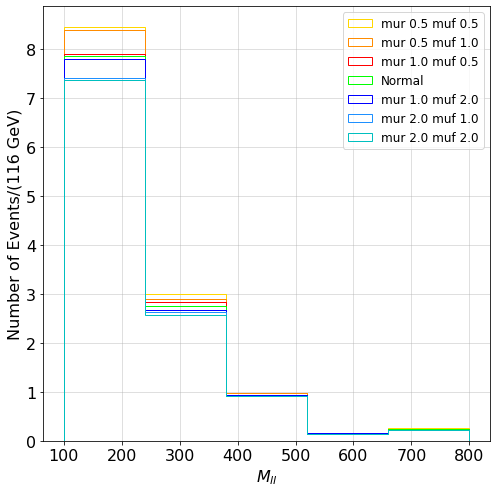

In [13]:
LHEscaleIdx = [0,1,3,4,5,7,8]
LHEScalemap = {0:"mur 0.5 muf 0.5",
               1:"mur 0.5 muf 1.0",
               3:"mur 1.0 muf 0.5",
               4:"Normal",
               5:"mur 1.0 muf 2.0",
               7:"mur 2.0 muf 1.0",
               8:"mur 2.0 muf 2.0",
              }

LHEScaleCmap ={
                0:"gold",
                1:"darkorange",
                3:"red",
                4:"lime",
                5:"blue",
                7:"dodgerblue",
                8:"c"
}

plt.close()
plt.figure(figsize=(8, 8))  # Figure size
bins = np.linspace(100,800,6) # divide start-end range with 'bin' number
binwidth = (800 - 100) / 6  # width of one bin


hist_list=[]
for idx in LHEscaleIdx:
    arrays['Generator_weight_sgn'] = arrays['Generator_weight']  / abs(arrays['Generator_weight'])
    arrays['true_weight'] = arrays['LHEScaleWeight'][:,idx] * Total_SF_weight * lumi * filelist_MC['WZG']['xsec'] * 1000 * arrays['Generator_weight_sgn'] / true_events

    x=plt.hist(np.clip(ak.to_numpy(arrays[hist_name]),100,800), weights=arrays['true_weight'],bins=bins, histtype='step',color=LHEScaleCmap[idx],label=LHEScalemap[idx])  # label is needed to draw legend

    hist_list.append(x)
    #lt.hist(arrays['WZG_dileptonmass'],bins=bins,histtype='step',label=LHEScalemap[idx])  # label is needed to draw legend
    

plt.xticks(fontsize=16)  # xtick size
plt.xlabel('$M_{ll}$', fontsize=16)  # X-label    
plt.ylabel("Number of Events/(%d GeV)" % binwidth, fontsize=16)
plt.yticks(fontsize=16) 
    
plt.grid(alpha=0.5)
plt.legend(prop={"size": 12}) 

## Make delta( normal , upper or lower )

In [14]:
rows=[]
columns=[0,1,2,3,4]
for w in hist_list:
    print(hist_list[3][0] - w[0])
    rows.append(hist_list[3][0] - w[0])
error_df = pd.DataFrame(rows,columns=columns)
error_df

[-0.59316901 -0.23526719 -0.03875778  0.00635698 -0.02566706]
[-0.53818524 -0.1453854  -0.03959857 -0.00215129 -0.01258497]
[-0.03866394 -0.0807076  -0.00016217  0.00738949 -0.0125637 ]
[0. 0. 0. 0. 0.]
[ 0.06770557  0.07568593 -0.00351866 -0.00839527  0.01086957]
[0.44068231 0.12032834 0.03274901 0.00183961 0.01060094]
[ 0.49471381  0.18943349  0.03044774 -0.0055358   0.02109958]


,0,1,2,3,4
0,-0.593169,-0.235267,-0.038758,0.006357,-0.025667
1,-0.538185,-0.145385,-0.039599,-0.002151,-0.012585
2,-0.038664,-0.080708,-0.000162,0.007389,-0.012564
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.067706,0.075686,-0.003519,-0.008395,0.010870
5,0.440682,0.120328,0.032749,0.001840,0.010601
6,0.494714,0.189433,0.030448,-0.005536,0.021100


In [15]:
## upper
error_df.loc[0:2].abs().max()

0    0.593169
1    0.235267
2    0.039599
3    0.007389
4    0.025667
dtype: float64

In [16]:
## Upper uncertainty
error_df.loc[0:2].abs().max() / hist_list[3][0]

0    0.075478
1    0.085285
2    0.041886
3    0.049641
4    0.107550
dtype: float64

In [17]:
## lower
error_df.loc[4:7].abs().max()

0    0.494714
1    0.189433
2    0.032749
3    0.008395
4    0.021100
dtype: float64

In [18]:
# Lowe uncertainty
error_df.loc[4:7].abs().max() / hist_list[3][0]

0    0.062950
1    0.068670
2    0.034641
3    0.056397
4    0.088411
dtype: float64

In [19]:
Unc_df = pd.DataFrame({'ScaleUp':error_df.loc[0:2].abs().max() / hist_list[3][0], 'ScaleDown':error_df.loc[4:7].abs().max() / hist_list[3][0]})
Unc_df

,ScaleUp,ScaleDown
0,0.075478,0.062950
1,0.085285,0.068670
2,0.041886,0.034641
3,0.049641,0.056397
4,0.107550,0.088411


## Draw Uncertainty plot

In [20]:
# Make middle point of histogram to build error plot
middle_point_bin=[]
for i in range(len(hist_list[0][1])-1):
    middle_point_bin.append((hist_list[0][1][i+1] +  hist_list[0][1][i])/2)
print(middle_point_bin)

[170.0, 310.0, 450.0, 590.0, 730.0]


[]

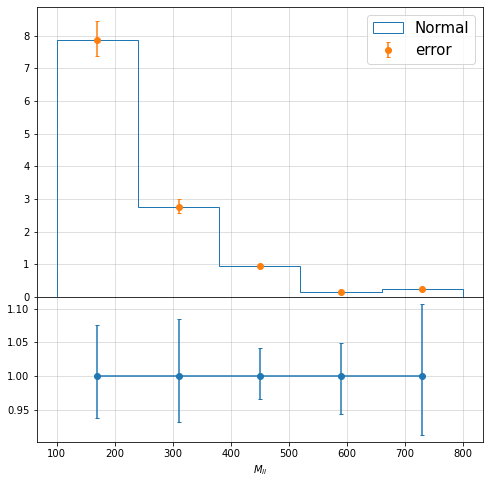

In [21]:
from matplotlib import gridspec
arrays['Generator_weight_sgn'] = arrays['Generator_weight']  / abs(arrays['Generator_weight'])
arrays['true_weight'] = arrays['LHEScaleWeight'][:,4] * Total_SF_weight * lumi * filelist_MC['WZG']['xsec'] * 1000 * arrays['Generator_weight_sgn'] / true_events
plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 
ax0 = plt.subplot(gs[0])




bins = np.linspace(100, 800, 6)  # divide start-end range with 'bin' number
binwidth = (800 - 100) / 6  # width of one bin

ax0.hist(np.clip(ak.to_numpy(arrays[hist_name]),100,800),weights=arrays['true_weight'],bins=bins, histtype='step',label=LHEScalemap[4])
ax0.errorbar(middle_point_bin,hist_list[3][0],[error_df.loc[4:7].abs().max(),error_df.loc[0:2].abs().max()],fmt='o',linestyle='',capsize=2,label='error')
 

    
ax0.grid(alpha=0.5)
ax0.legend(prop={"size": 15}) 

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(middle_point_bin,hist_list[3][0]/hist_list[3][0],[error_df.loc[4:7].abs().max()/hist_list[3][0],error_df.loc[0:2].abs().max()/hist_list[3][0]],fmt='o-',capsize=2,label='error')
ax1.grid(alpha=0.5)
plt.xlabel('$M_{ll}$')
plt.setp(ax0.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
plt.plot()

# Ch2. Pdf Weight calculation

In [22]:
arrays['LHEPdfWeight'][:,0]

<Array [1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1] type='2052 * float32'>

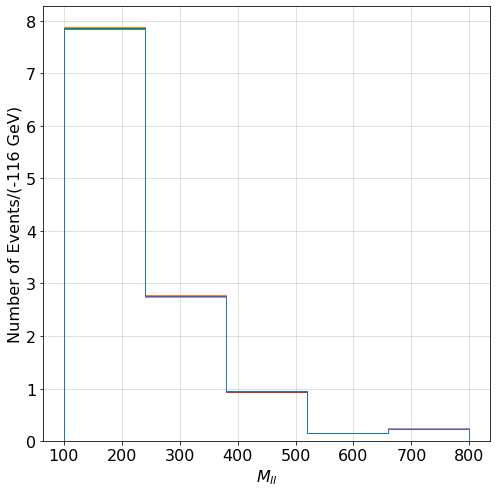

In [23]:
plt.close()
plt.figure(figsize=(8, 8))  # Figure size
bins = np.linspace(100, 800, 6)  # divide start-end range with 'bin' number
binwidth = (100 - 800) / 6  # width of one bin


hist_list=[]
for idx in range(0,101):
    arrays['Generator_weight_sgn'] = arrays['Generator_weight']  / abs(arrays['Generator_weight'])
    arrays['true_weight'] = arrays['LHEPdfWeight'][:,idx] * Total_SF_weight* lumi * filelist_MC['WZG']['xsec'] * 1000 * arrays['Generator_weight_sgn'] / true_events
    
    x=plt.hist(np.clip(ak.to_numpy(arrays[hist_name]),100,800), weights=arrays['true_weight'],bins=bins, histtype='step')  # label is needed to draw legend
    hist_list.append(x)
    #lt.hist(arrays['WZG_dileptonmass'],bins=bins,histtype='step',label=LHEScalemap[idx])  # label is needed to draw legend
    

plt.xticks(fontsize=16)  # xtick size
plt.xlabel('$M_{ll}$', fontsize=16)  # X-label    
plt.ylabel("Number of Events/(%d GeV)" % binwidth, fontsize=16)
plt.yticks(fontsize=16) 
    
plt.grid(alpha=0.5)

In [24]:
len(hist_list)

101

In [25]:
hist_list[0][0]

array([7.8588589 , 2.75858619, 0.94538478, 0.14885979, 0.23865314])

In [26]:
rows=[]
columns=[0,1,2,3,4]
for w in hist_list:
    rows.append(hist_list[0][0] - w[0])
error_df = pd.DataFrame(rows,columns=columns)
error_df

,0,1,2,3,4
0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
1,-0.004564,0.001540,0.000395,-1.326462e-04,-1.766637e-04
2,0.005086,0.001901,0.000659,2.551753e-04,-8.450131e-05
3,0.003920,0.002661,-0.000851,-2.047142e-04,-1.597883e-03
4,-0.006538,-0.001637,-0.001211,-1.546512e-04,-2.476201e-03
...,...,...,...,...,...
96,0.001074,0.001006,0.000407,8.293020e-06,1.555162e-04
97,0.000137,0.000134,-0.000084,1.380805e-05,1.226156e-04
98,-0.001016,-0.001029,-0.000113,-8.127003e-05,-6.852487e-04
99,-0.000392,-0.000961,-0.000531,-5.769377e-05,-5.912341e-04


In [27]:
error_df.min()

0   -0.021572
1   -0.016117
2   -0.008408
3   -0.001317
4   -0.007780
dtype: float64

In [28]:
# lower unc
error_df.min()/hist_list[0][0]

0   -0.002745
1   -0.005842
2   -0.008894
3   -0.008845
4   -0.032598
dtype: float64

In [29]:
error_df.max()

0    0.012770
1    0.011830
2    0.005440
3    0.000789
4    0.003023
dtype: float64

In [30]:
#upper unc
error_df.max()/hist_list[0][0]

0    0.001625
1    0.004288
2    0.005754
3    0.005301
4    0.012667
dtype: float64

In [31]:
Unc_df['PDFUp'] = error_df.max()/hist_list[0][0]
Unc_df['PDFDown'] =  error_df.min()/hist_list[0][0]

In [32]:
# Make middle point of histogram to build error plot
middle_point_bin=[]
for i in range(len(hist_list[0][1])-1):
    middle_point_bin.append((hist_list[0][1][i+1] +  hist_list[0][1][i])/2)
print(middle_point_bin)

[170.0, 310.0, 450.0, 590.0, 730.0]


[]

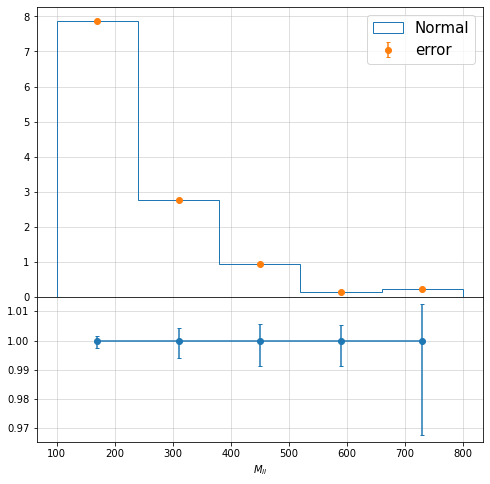

In [33]:
from matplotlib import gridspec
arrays['Generator_weight_sgn'] = arrays['Generator_weight']  / abs(arrays['Generator_weight'])
arrays['true_weight'] = arrays['LHEPdfWeight'][:,0] * Total_SF_weight * lumi * filelist_MC['WZG']['xsec'] * 1000 * arrays['Generator_weight_sgn'] / true_events
plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 
ax0 = plt.subplot(gs[0])




bins = np.linspace(100, 800, 6)  # divide start-end range with 'bin' number
binwidth = (100 - 800) / 6  # width of one bin

ax0.hist(np.clip(ak.to_numpy(arrays[hist_name]),100,800),weights=arrays['true_weight'],bins=bins, histtype='step',label='Normal')
ax0.errorbar(middle_point_bin,hist_list[0][0],[abs(error_df.min()),error_df.max()],fmt='o',linestyle='',capsize=2,label='error')
 

    
ax0.grid(alpha=0.5)
ax0.legend(prop={"size": 15}) 

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(middle_point_bin,hist_list[0][0]/hist_list[0][0],[abs(error_df.min())/hist_list[0][0],error_df.max()/hist_list[0][0]],fmt='o-',capsize=2,label='error')
ax1.grid(alpha=0.5)
plt.xlabel('$M_{ll}$')
plt.setp(ax0.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
plt.plot()

In [34]:
Unc_df

,ScaleUp,ScaleDown,PDFUp,PDFDown
0,0.075478,0.062950,0.001625,-0.002745
1,0.085285,0.068670,0.004288,-0.005842
2,0.041886,0.034641,0.005754,-0.008894
3,0.049641,0.056397,0.005301,-0.008845
4,0.107550,0.088411,0.012667,-0.032598
